## Exploration Data Analysis (EDA) Kelowna Fires dataset

**Status:** PUBLIC Distribution <br>
**File Name:** 00_EDA_Kelowna_fires_dataset.ipynb

**Author:** Jaume Manero / Darshana Upadhyay / Richard Purcell<br> 
**Date created:** 2023/06/19<br>
**Last modified:** 2023/06/19<br>
**Description:** Exploration of Kelowna Fires Dataset

Looking for Patterns

In [38]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import normalize
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
# Hyperparameters



In [40]:
path_ignition = './Data/ignition_rows.csv'
path_non_ignition = './Data/non_ignition_rows.csv'
ignition_df = pd.read_csv(path_ignition)  
non_ignition_df = pd.read_csv(path_non_ignition, nrows=1000000)  
ignition_df.columns

Index(['date', 'lon', 'lat', 'u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4', 'month', 'day', 'hour', 'ignition'],
      dtype='object')

In [41]:
cols_data = non_ignition_df.columns

In [42]:
#ignition_df.drop(['lon', 'lat', 'date', 'ignition'], axis=1, inplace=True)
#non_ignition_df.drop(['lon', 'lat', 'date', 'ignition'], axis=1, inplace=True)

In [43]:
ignition_df

,date,lon,lat,u10,v10,d2m,t2m,e,cvh,cvl,...,sp,tp,swvl1,swvl2,swvl3,swvl4,month,day,hour,ignition
0,4.180356e+08,-119.25,50.75,-0.638755,0.914924,270.945857,274.251106,-9.660722e-08,0.982031,0.014115,...,92385.908965,-8.673617e-19,0.409504,0.407843,0.379622,0.378540,4,1,9,1
1,4.180572e+08,-122.00,51.00,-0.379458,1.673653,269.157756,272.592277,-2.788550e-06,0.892063,0.087577,...,86265.632588,-8.673617e-19,0.341352,0.332430,0.332058,0.352431,4,1,15,1
2,4.180644e+08,-121.50,51.00,-1.811292,2.898143,269.098677,272.279144,-1.780292e-05,0.982198,0.017803,...,86661.025206,3.879493e-06,0.371114,0.354215,0.343134,0.369659,4,1,17,1
3,4.180644e+08,-119.75,50.00,-1.043743,0.782971,271.582590,275.707218,-2.995840e-05,0.719243,0.208206,...,89733.235255,-8.673617e-19,0.393442,0.393846,0.379574,0.360351,4,1,17,1
4,4.180752e+08,-120.25,52.00,-2.150360,3.941395,267.074263,274.157943,-9.043321e-05,0.979831,0.017420,...,86346.216174,6.178451e-06,0.331040,0.325413,0.303781,0.368025,4,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51913,1.602162e+09,-119.00,50.50,-0.579377,1.220124,280.374553,280.805579,-3.934702e-06,0.925685,0.051925,...,90144.076276,9.463253e-07,0.256368,0.256701,0.250626,0.312791,10,8,13,1
51914,1.602252e+09,-116.00,49.75,0.789841,1.023486,277.491186,277.744978,5.663771e-06,0.962267,0.037733,...,84321.628987,9.581543e-06,0.188715,0.155508,0.176283,0.266069,10,9,14,1
51915,1.602421e+09,-121.50,51.75,1.396343,0.999898,274.208045,274.207534,-5.632813e-06,0.999878,0.000031,...,88671.964973,9.463253e-07,0.402503,0.392438,0.323796,0.375503,10,11,13,1
51916,1.602673e+09,-116.00,49.75,2.080044,0.776145,269.055130,270.381528,8.200584e-06,0.962267,0.037733,...,84226.696015,1.336684e-05,0.265458,0.187965,0.177314,0.265303,10,14,11,1


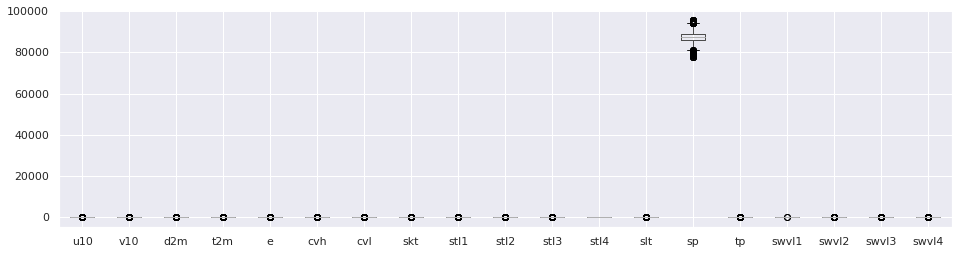

In [44]:
# Boxplot columns
fig, ax = plt.subplots(figsize=(16,4))
boxplot = ignition_df.boxplot(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4'])  

In [45]:
# we create a numpy array with the features of every row
ignition_np = ignition_df.to_numpy()
print('ignition shape',ignition_np.shape)
non_ignition_np = non_ignition_df.to_numpy()
print('non_ignition shape',non_ignition_np.shape)

ignition shape (51918, 26)
non_ignition shape (1000000, 26)


In [46]:
ignition_df = ignition_df.replace([np.inf, -np.inf], 0)
scaler = MinMaxScaler()
ignition_scaled = scaler.fit_transform(ignition_df)
ignition_scaled_df = pd.DataFrame(ignition_scaled, columns=cols_data)
ignition_scaled_df.shape

(51918, 26)

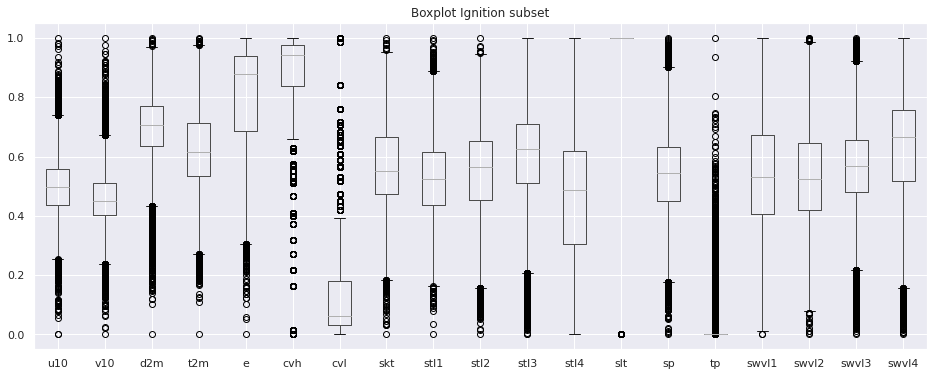

In [47]:
# Boxplot columns
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title('Boxplot Ignition subset')
boxplot = ignition_scaled_df.boxplot(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4'])    

In [48]:
non_ignition_df = non_ignition_df.replace([np.inf, -np.inf], 0)
scaler = MinMaxScaler()
non_ignition_scaled = scaler.fit_transform(non_ignition_df)
non_ignition_scaled_df = pd.DataFrame(non_ignition_scaled, columns=cols_data)
non_ignition_scaled_df.shape


(1000000, 26)

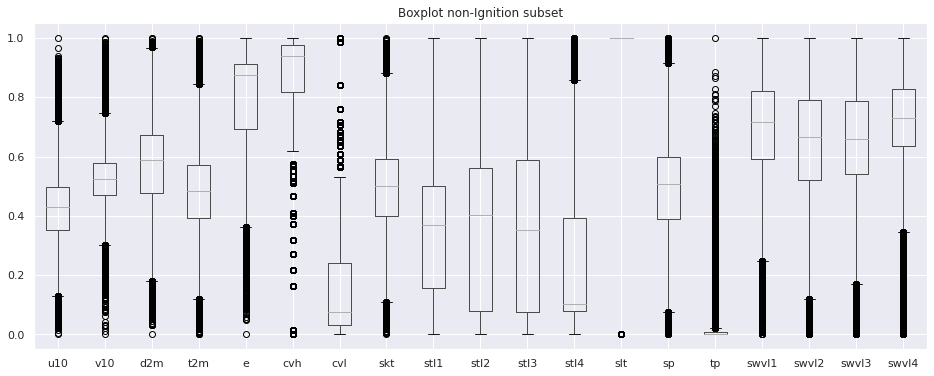

In [49]:
# Boxplot columns
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title('Boxplot non-Ignition subset')
boxplot = non_ignition_scaled_df.boxplot(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4'])  

/tmp/ipykernel_11533/3843665213.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = ignition_scaled_df.hist(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',


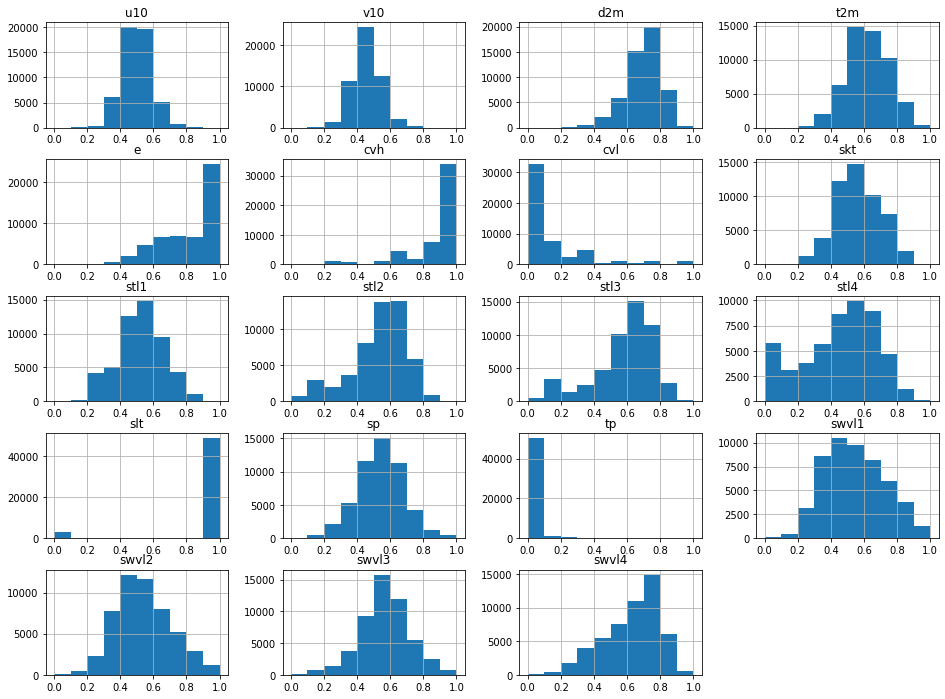

In [20]:
# Boxplot columns
fig,ax  = plt.subplots(figsize=(16,12))
ax.set_title('Boxplot Ignition subset')
hist = ignition_scaled_df.hist(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4'],ax =ax)
plt.show()

/tmp/ipykernel_11533/924183410.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = non_ignition_scaled_df.hist(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',


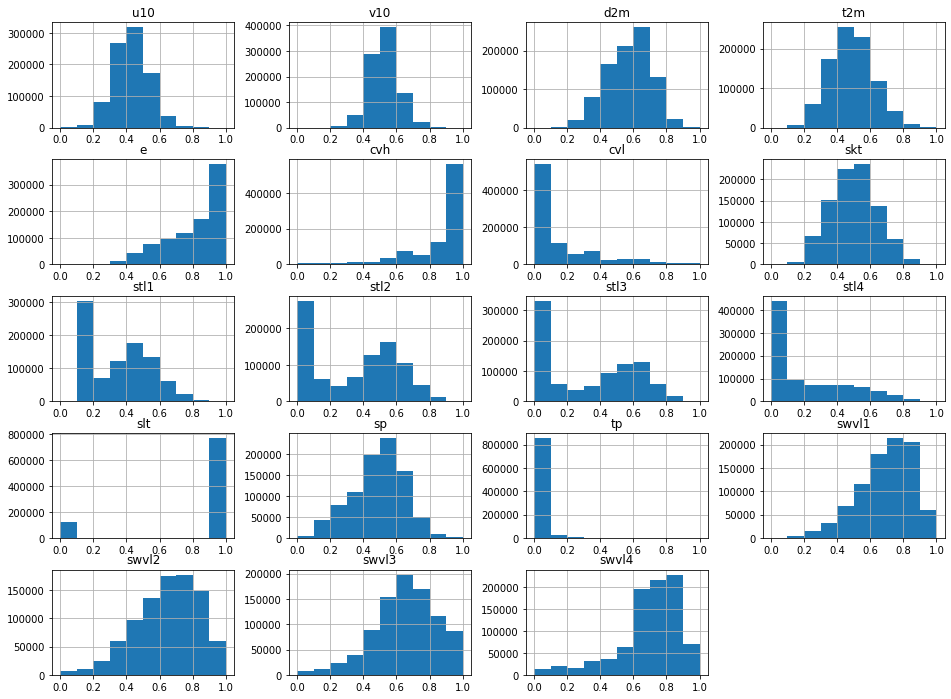

In [21]:
# Boxplot columns
fig,ax  = plt.subplots(figsize=(16,12))
ax.set_title('Boxplot Ignition subset')
hist = non_ignition_scaled_df.hist(column=['u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4'],ax =ax)
plt.show()

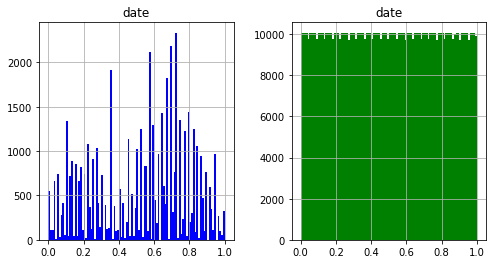

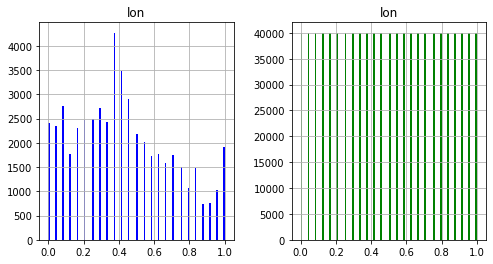

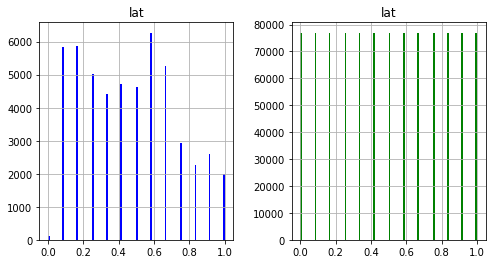

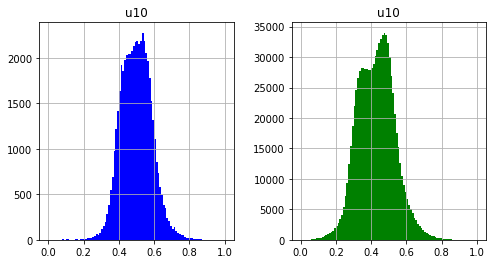

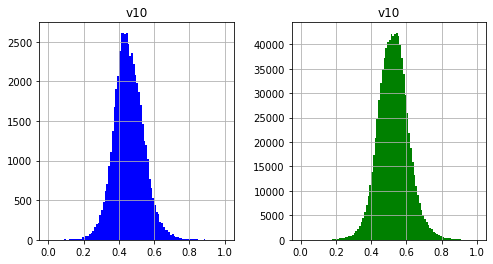

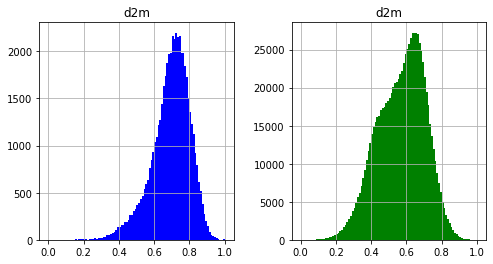

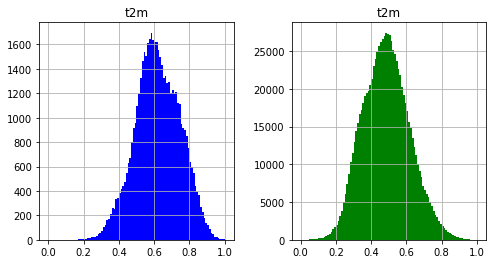

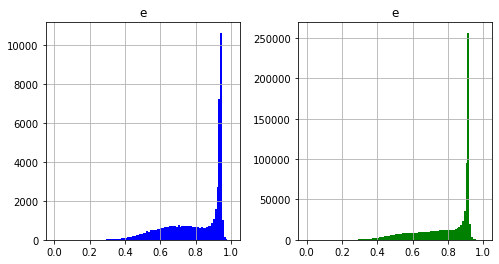

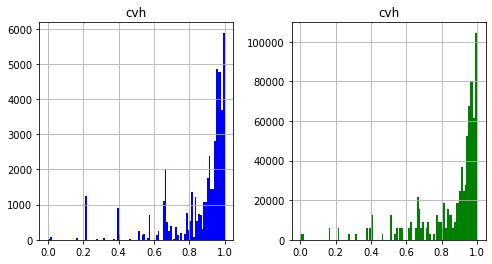

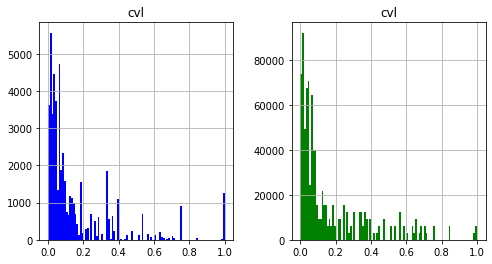

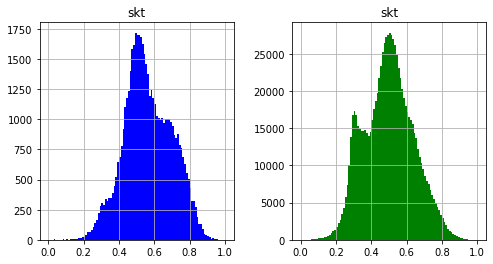

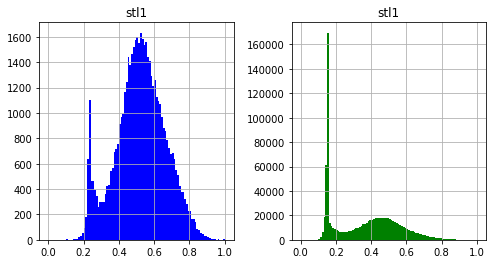

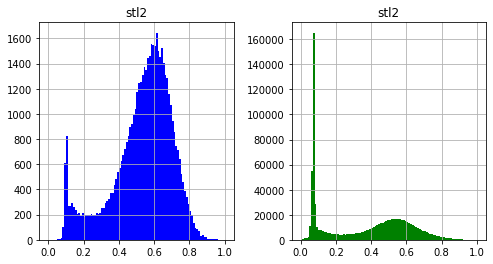

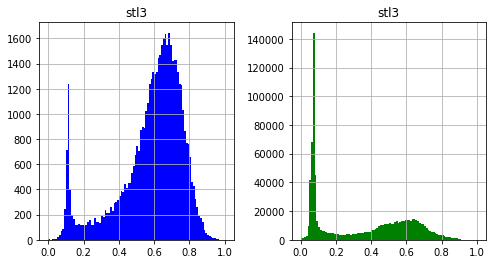

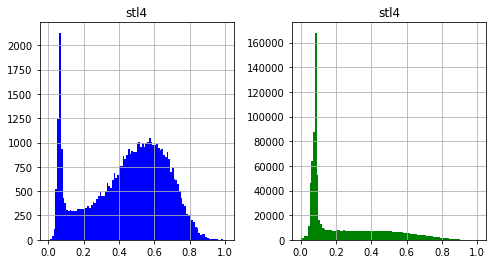

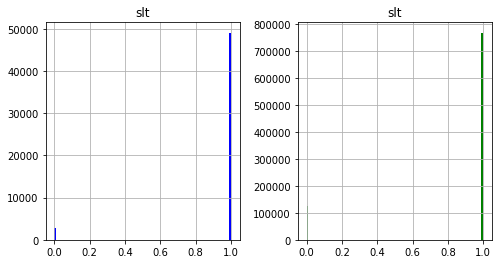

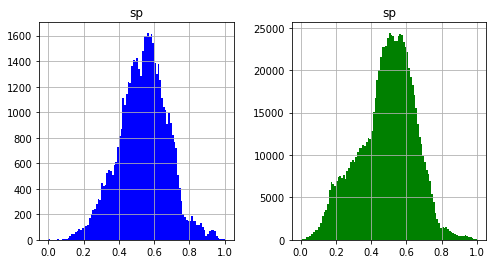

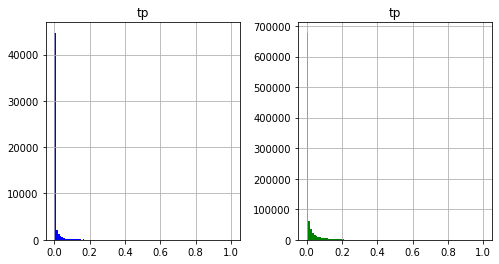

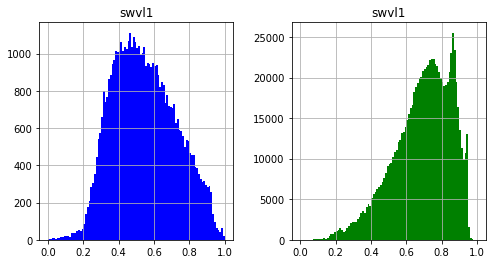

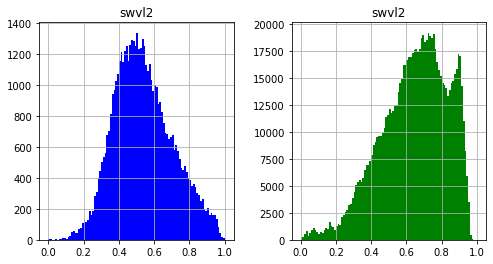

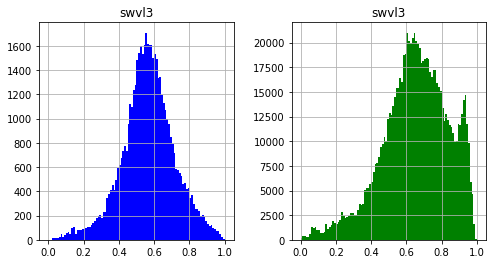

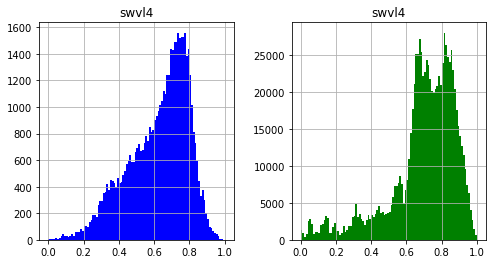

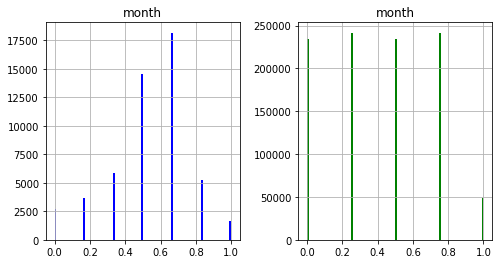

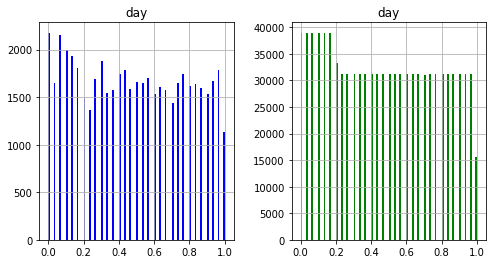

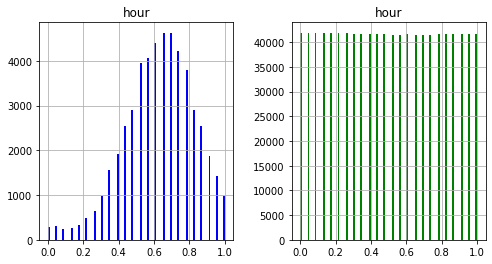

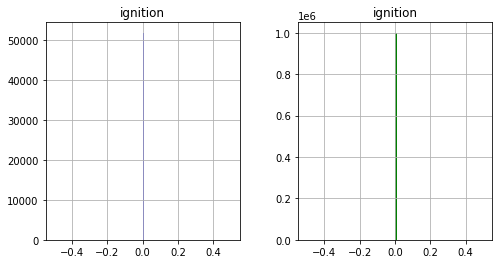

In [32]:
# Boxplot columns
for c in cols_data:
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
   ax1.set_title('Boxplot Ignition subset'+c)
   ignition_scaled_df.hist(column=[c],ax =ax1, color='blue', label='ignition', bins=100)
   non_ignition_scaled_df.hist(column=[c],ax =ax2, color='green', bins=100)
   plt.show()

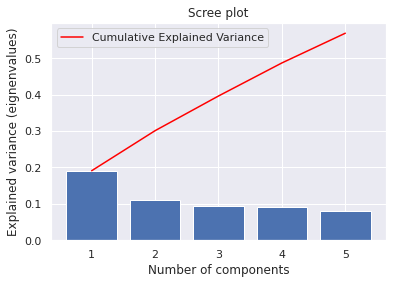

In [37]:
from sklearn.decomposition import PCA
#remove Nans and convert them to 0

X = np.nan_to_num(ignition_scaled)

sns.set()
 
pca = PCA(n_components=5)
 
reduced_features = pca.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [ ]:
#===== program ends here. now create a new label and label non-ignition dataset with new class ===== #

In [50]:
import session_info
session_info.show(html=False)

-----
keras               2.12.0
matplotlib          3.5.0
numpy               1.22.4
pandas              1.5.3
seaborn             0.11.2
session_info        1.0.0
sklearn             1.2.1
-----
IPython             7.29.0
jupyter_client      8.2.0
jupyter_core        5.3.0
notebook            6.5.4
-----
Python 3.8.12 (default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
Linux-5.19.0-45-generic-x86_64-with-glibc2.17
-----
Session information updated at 2023-06-25 21:19


### 